In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
directory = 'histories'

print(f'There are following files in {directory}:')
print('\n'.join(os.listdir(directory)))

There are following files in histories:
2023-11-22-17-24.pkl
2023-11-27-21-37.pkl
2023-11-28-12-51.pkl
2023-11-28-16-02.pkl
2023-11-28-18-45.pkl
2023-12-01-15-24.pkl
.ipynb_checkpoints
2023-12-03-14-01.pkl
2023-12-03-17-34.pkl
2023-12-04-12-01.pkl


In [3]:
#names = ['2023-12-03-14-01.pkl', '2023-12-03-17-34.pkl']
names = ['2023-12-04-12-01.pkl']

hists = []
for name in names:
    with open(os.path.join(directory, name), 'rb') as file:
        hist = pickle.load(file)
        hists.append(hist)

2023-12-04 15:05:01.874530: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


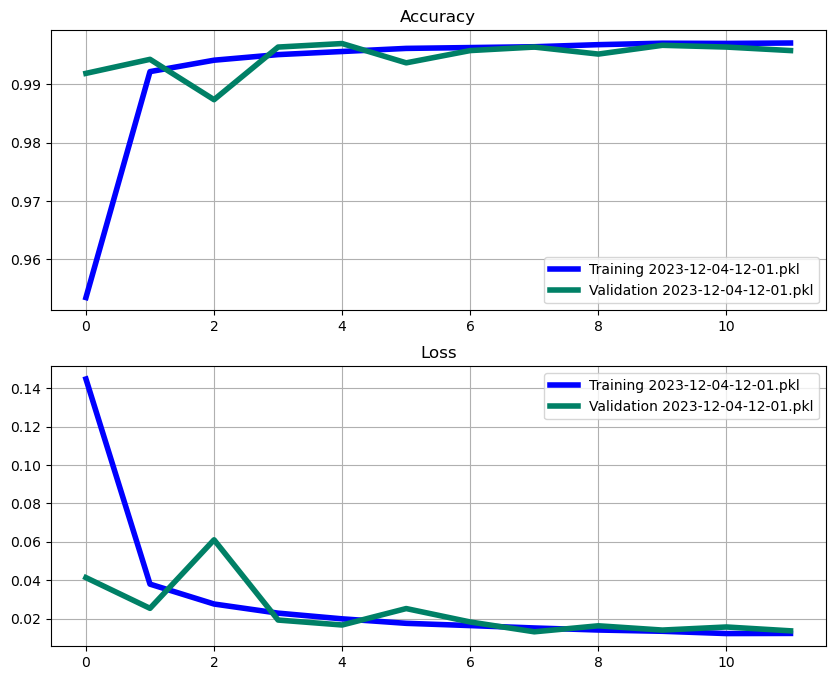

In [4]:
cmap_val = cm.summer
cmap_trn = cm.winter

fig, axs = plt.subplots(2, 1)
fig.set_figwidth(10)
fig.set_figheight(8)

axs[0].set_title('Accuracy')
axs[1].set_title('Loss')

space = 0
for i in range(len(names)):
    color_trn = cmap_trn(i/len(names))
    if i > 0:
        x = [space - 1, space]
        ya = [hists[i - 1].history['accuracy'][-1], hists[i].history['accuracy'][0]]
        yl = [hists[i - 1].history['loss'][-1], hists[i].history['loss'][0]]
        axs[0].plot(x, ya, linewidth=4, color=color_trn, linestyle=':')
        axs[1].plot(x, yl, linewidth=4, color=color_trn, linestyle=':')
    history = hists[i]
    axs[0].plot(np.array(history.epoch) + space, history.history['accuracy'], linewidth=4, color=color_trn, label=f'Training {names[i]}')
    axs[1].plot(np.array(history.epoch) + space, history.history['loss'], linewidth=4, color=color_trn, label=f'Training {names[i]}')
    space += len(history.epoch)
    
space = 0
for i in range(len(names)):
    color_val = cmap_val(i/len(names))
    if i > 0:
        x = [space - 1, space]
        ya = [hists[i - 1].history['val_accuracy'][-1], hists[i].history['val_accuracy'][0]]
        yl = [hists[i - 1].history['val_loss'][-1], hists[i].history['val_loss'][0]]
        axs[0].plot(x, ya, linewidth=4, color=color_val, linestyle=':')
        axs[1].plot(x, yl, linewidth=4, color=color_val, linestyle=':')
    history = hists[i]
    axs[0].plot(np.array(history.epoch) + space, history.history['val_accuracy'], linewidth=4, color=color_val, label=f'Validation {names[i]}')
    axs[1].plot(np.array(history.epoch) + space, history.history['val_loss'], linewidth=4, color=color_val, label=f'Validation {names[i]}')
    space += len(history.epoch)
    
axs[0].legend()
axs[1].legend()
axs[0].grid(True)
axs[1].grid(True)

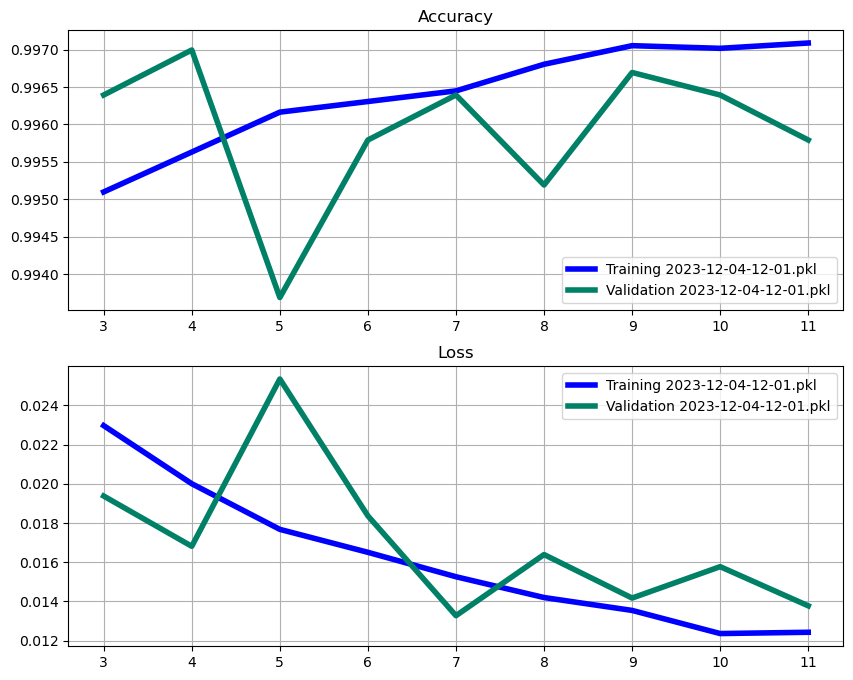

In [5]:
border = 3

cmap_val = cm.summer
cmap_trn = cm.winter

fig, axs = plt.subplots(2, 1)
fig.set_figwidth(10)
fig.set_figheight(8)

axs[0].set_title('Accuracy')
axs[1].set_title('Loss')

space = 0
for i in range(len(names)):
    color_trn = cmap_trn(i/len(names))
    if (i > 0) and (space > border):
        x = [space - 1, space]
        ya = [hists[i - 1].history['accuracy'][-1], hists[i].history['accuracy'][0]]
        yl = [hists[i - 1].history['loss'][-1], hists[i].history['loss'][0]]
        axs[0].plot(x, ya, linewidth=4, color=color_trn, linestyle=':')
        axs[1].plot(x, yl, linewidth=4, color=color_trn, linestyle=':')
    history = hists[i]
    idx = (np.array(history.epoch) + space >= border)
    axs[0].plot((np.array(history.epoch) + space)[idx], np.array(history.history['accuracy'])[idx], linewidth=4, color=color_trn, label=f'Training {names[i]}')
    axs[1].plot((np.array(history.epoch) + space)[idx], np.array(history.history['loss'])[idx], linewidth=4, color=color_trn, label=f'Training {names[i]}')
    space += len(history.epoch)
    
space = 0
for i in range(len(names)):
    color_val = cmap_val(i/len(names))
    if (i > 0) and (space > border):
        x = [space - 1, space]
        ya = [hists[i - 1].history['val_accuracy'][-1], hists[i].history['val_accuracy'][0]]
        yl = [hists[i - 1].history['val_loss'][-1], hists[i].history['val_loss'][0]]
        axs[0].plot(x, ya, linewidth=4, color=color_val, linestyle=':')
        axs[1].plot(x, yl, linewidth=4, color=color_val, linestyle=':')
    history = hists[i]
    idx = (np.array(history.epoch) + space >= border)
    axs[0].plot((np.array(history.epoch) + space)[idx], np.array(history.history['val_accuracy'])[idx], linewidth=4, color=color_val, label=f'Validation {names[i]}')
    axs[1].plot((np.array(history.epoch) + space)[idx], np.array(history.history['val_loss'])[idx], linewidth=4, color=color_val, label=f'Validation {names[i]}')
    space += len(history.epoch)
    
axs[0].legend()
axs[1].legend()
axs[0].grid(True)
axs[1].grid(True)